In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
import matplotlib.pylab as plt
from sklearn.metrics import classification_report, confusion_matrix
from dmba import plotDecisionTree, classificationSummary, regressionSummary

no display found. Using non-interactive Agg backend


In [2]:
df = pd.read_csv('/Users/aminazimi/Downloads/cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [4]:
df = df.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,7


In [5]:
df.shape

(38531, 20)

In [6]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [7]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'duration_listed'],
      dtype='object')

In [8]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
duration_listed        int64
dtype: object

In [9]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
duration_listed       0
dtype: int64

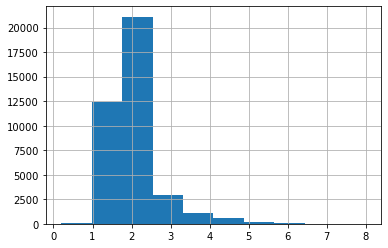

In [10]:
%matplotlib inline
df['engine_capacity'].hist()
plt.show()

In [11]:
df['engine_capacity'] = df['engine_capacity'].fillna(df['engine_capacity'].median())
df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

In [12]:
#no null values, we can proceed to eda now

In [13]:
df['age'] = 2022 - df['year_produced']
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,age
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,False,owned,all,10900.00,False,Минская обл.,9,13,16,12
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,owned,all,5000.00,True,Минская обл.,12,54,83,20
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2800.00,True,Минская обл.,4,72,151,21
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,owned,all,9999.00,True,Минская обл.,9,42,86,23
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2134.11,True,Гомельская обл.,14,7,7,21


In [14]:
dfn = df.select_dtypes(include=['float64', 'int64'])
dfn.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,age
0,190000,2010,2.5,10900.00,9,13,16,12
1,290000,2002,3.0,5000.00,12,54,83,20
2,402000,2001,2.5,2800.00,4,72,151,21
3,10000,1999,3.0,9999.00,9,42,86,23
4,280000,2001,2.5,2134.11,14,7,7,21


In [15]:
cor = dfn.corr()
cor

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,age
odometer_value,1.000000,-0.488679,0.105707,-0.421204,-0.143708,-0.020961,-0.000428,0.488679
year_produced,-0.488679,1.000000,0.005028,0.705511,0.258180,0.007945,-0.017001,-1.000000
engine_capacity,0.105707,0.005028,1.000000,0.296386,0.106658,0.079151,0.080085,-0.005028
price_usd,-0.421204,0.705511,0.296386,1.000000,0.316859,0.057382,0.033524,-0.705511
number_of_photos,-0.143708,0.258180,0.106658,0.316859,1.000000,0.073891,-0.028255,-0.258180
up_counter,-0.020961,0.007945,0.079151,0.057382,0.073891,1.000000,0.698116,-0.007945
duration_listed,-0.000428,-0.017001,0.080085,0.033524,-0.028255,0.698116,1.000000,0.017001
age,0.488679,-1.000000,-0.005028,-0.705511,-0.258180,-0.007945,0.017001,1.000000


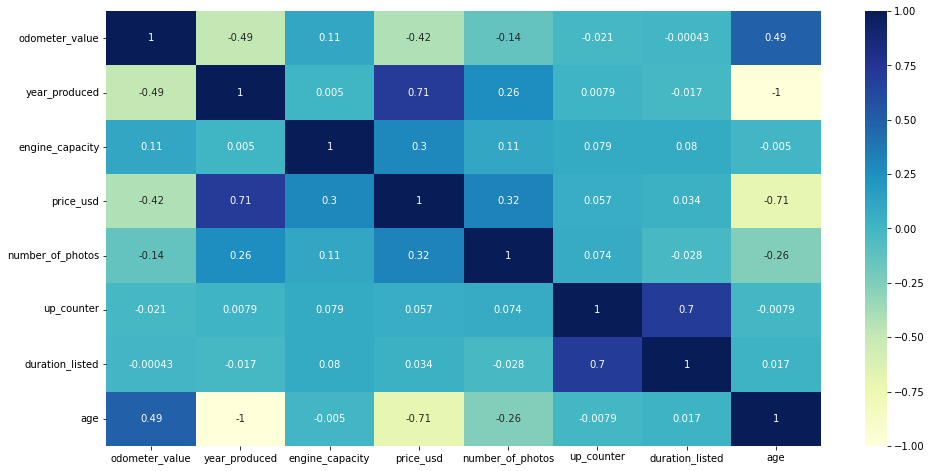

In [16]:
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [17]:
dfn = dfn.drop(columns=['year_produced'])
dfn

,odometer_value,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,age
0,190000,2.5,10900.00,9,13,16,12
1,290000,3.0,5000.00,12,54,83,20
2,402000,2.5,2800.00,4,72,151,21
3,10000,3.0,9999.00,9,42,86,23
4,280000,2.5,2134.11,14,7,7,21
...,...,...,...,...,...,...,...
38526,290000,3.5,2750.00,5,85,301,22
38527,321000,2.2,4800.00,4,20,317,18
38528,777957,3.5,4300.00,3,63,369,22
38529,20000,2.0,4000.00,7,156,490,21


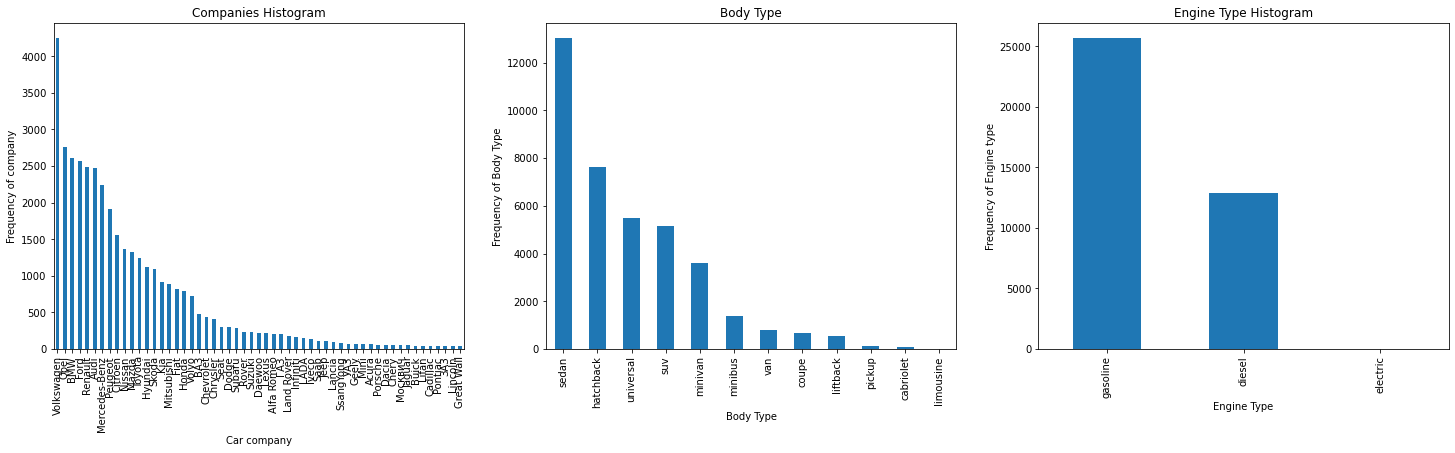

In [18]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.manufacturer_name.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.body_type.value_counts().plot(kind='bar')
plt.title('Body Type')
plt1.set(xlabel = 'Body Type', ylabel='Frequency of Body Type')

plt.subplot(1,3,3)
plt1 = df.engine_type.value_counts().plot(kind='bar')
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine type')

plt.show()

In [19]:
#most people use volkswagen
#sedans are preferred
#most cars are gasoline

<Figure size 2160x720 with 0 Axes>

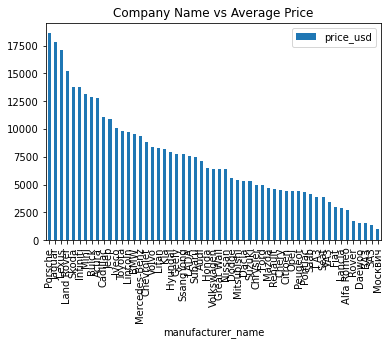

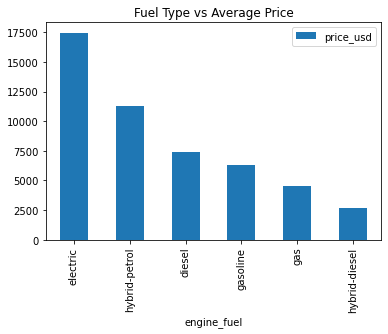

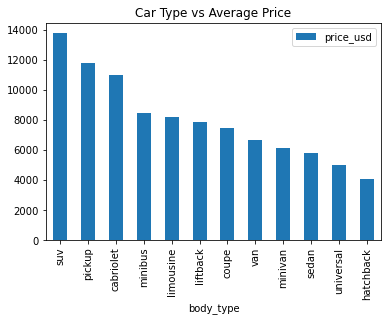

In [20]:
plt.figure(figsize=(30, 10))

df1 = pd.DataFrame(df.groupby(['manufacturer_name'])['price_usd'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df1 = pd.DataFrame(df.groupby(['engine_fuel'])['price_usd'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df1 = pd.DataFrame(df.groupby(['body_type'])['price_usd'].mean().sort_values(ascending = False))
df1.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [21]:
#porsche, jaguar, and lexus are the most expensive
#electric care are more expensive
#suvs are more expensive

In [22]:
df['price_usd'] = df['price_usd'].astype('float64')
temp = df.copy()

table = temp.groupby(['manufacturer_name'])['price_usd'].mean()
temp = temp.merge(table.reset_index(), how='left', on='manufacturer_name')
bins = [0,10000,25000,50000]
cars_bins = ['Budget','Medium', 'Highend']

In [23]:
temp.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,state,drivetrain,price_usd_x,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,age,price_usd_y
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,owned,all,10900.00,False,Минская обл.,9,13,16,12,7522.094605
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,owned,all,5000.00,True,Минская обл.,12,54,83,20,7522.094605
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,owned,all,2800.00,True,Минская обл.,4,72,151,21,7522.094605
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,owned,all,9999.00,True,Минская обл.,9,42,86,23,7522.094605
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,owned,all,2134.11,True,Гомельская обл.,14,7,7,21,7522.094605


In [24]:
df['CarRange'] = pd.cut(temp['price_usd_y'], bins,  right=False, labels=cars_bins)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,age,CarRange
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,owned,all,10900.00,False,Минская обл.,9,13,16,12,Budget
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,owned,all,5000.00,True,Минская обл.,12,54,83,20,Budget
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,owned,all,2800.00,True,Минская обл.,4,72,151,21,Budget
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,owned,all,9999.00,True,Минская обл.,9,42,86,23,Budget
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,owned,all,2134.11,True,Гомельская обл.,14,7,7,21,Budget


In [25]:
df_new = df[['transmission','color','odometer_value','engine_fuel','engine_has_gas','engine_type','engine_capacity','body_type'
                , 'has_warranty','state','drivetrain','is_exchangeable','number_of_photos', 'up_counter','duration_listed', 'age','CarRange','price_usd']]
df_new.head()

,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,is_exchangeable,number_of_photos,up_counter,duration_listed,age,CarRange,price_usd
0,automatic,silver,190000,gasoline,False,gasoline,2.5,universal,False,owned,all,False,9,13,16,12,Budget,10900.00
1,automatic,blue,290000,gasoline,False,gasoline,3.0,universal,False,owned,all,True,12,54,83,20,Budget,5000.00
2,automatic,red,402000,gasoline,False,gasoline,2.5,suv,False,owned,all,True,4,72,151,21,Budget,2800.00
3,mechanical,blue,10000,gasoline,False,gasoline,3.0,sedan,False,owned,all,True,9,42,86,23,Budget,9999.00
4,automatic,black,280000,gasoline,False,gasoline,2.5,universal,False,owned,all,True,14,7,7,21,Budget,2134.11


In [26]:
def dummies(x,df):
    temp = pd.get_dummies(df[[x]], drop_first=True)
    df = pd.concat([df,temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

# Apply function to the cars_new df
df_new = dummies('transmission', df_new)
df_new = dummies('color', df_new)
df_new = dummies('engine_fuel', df_new)
df_new = dummies('engine_has_gas', df_new)
df_new = dummies('engine_type', df_new)
df_new = dummies('body_type', df_new)
df_new = dummies('has_warranty', df_new)
df_new = dummies('state', df_new)
df_new = dummies('drivetrain', df_new)
df_new = dummies('is_exchangeable', df_new)
df_new = dummies('CarRange', df_new)

In [27]:
df_new.head()

,odometer_value,engine_capacity,number_of_photos,up_counter,duration_listed,age,price_usd,transmission_mechanical,color_blue,color_brown,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_new,state_owned,drivetrain_front,drivetrain_rear,CarRange_Medium,CarRange_Highend
0,190000,2.5,9,13,16,12,10900.00,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,290000,3.0,12,54,83,20,5000.00,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,402000,2.5,4,72,151,21,2800.00,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,10000,3.0,9,42,86,23,9999.00,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,280000,2.5,14,7,7,21,2134.11,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_new, train_size=0.7, random_state=42) 

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars= ['odometer_value', 'engine_capacity', 'number_of_photos','up_counter','duration_listed', 'age','price_usd']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [30]:
df_train.head()

,odometer_value,engine_capacity,number_of_photos,up_counter,duration_listed,age,price_usd,transmission_mechanical,color_blue,color_brown,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_new,state_owned,drivetrain_front,drivetrain_rear,CarRange_Medium,CarRange_Highend
912,0.121,0.166667,0.388235,0.005914,0.010753,0.207792,0.049981,1,0,0,...,0,0,1,0,0,1,1,0,0,0
16281,0.546,0.294872,0.035294,0.012366,0.028674,0.272727,0.205984,1,1,0,...,0,0,0,0,0,1,1,0,0,0
11836,1.000,0.230769,0.035294,0.000538,0.038530,0.428571,0.019980,1,0,0,...,0,0,1,0,0,1,0,1,0,0
13126,0.370,0.192308,0.070588,0.001613,0.014785,0.350649,0.015980,1,0,0,...,1,0,0,0,0,1,1,0,0,0
16552,0.480,0.217949,0.047059,0.001613,0.012545,0.285714,0.077982,1,1,0,...,0,0,1,0,0,1,1,0,0,0


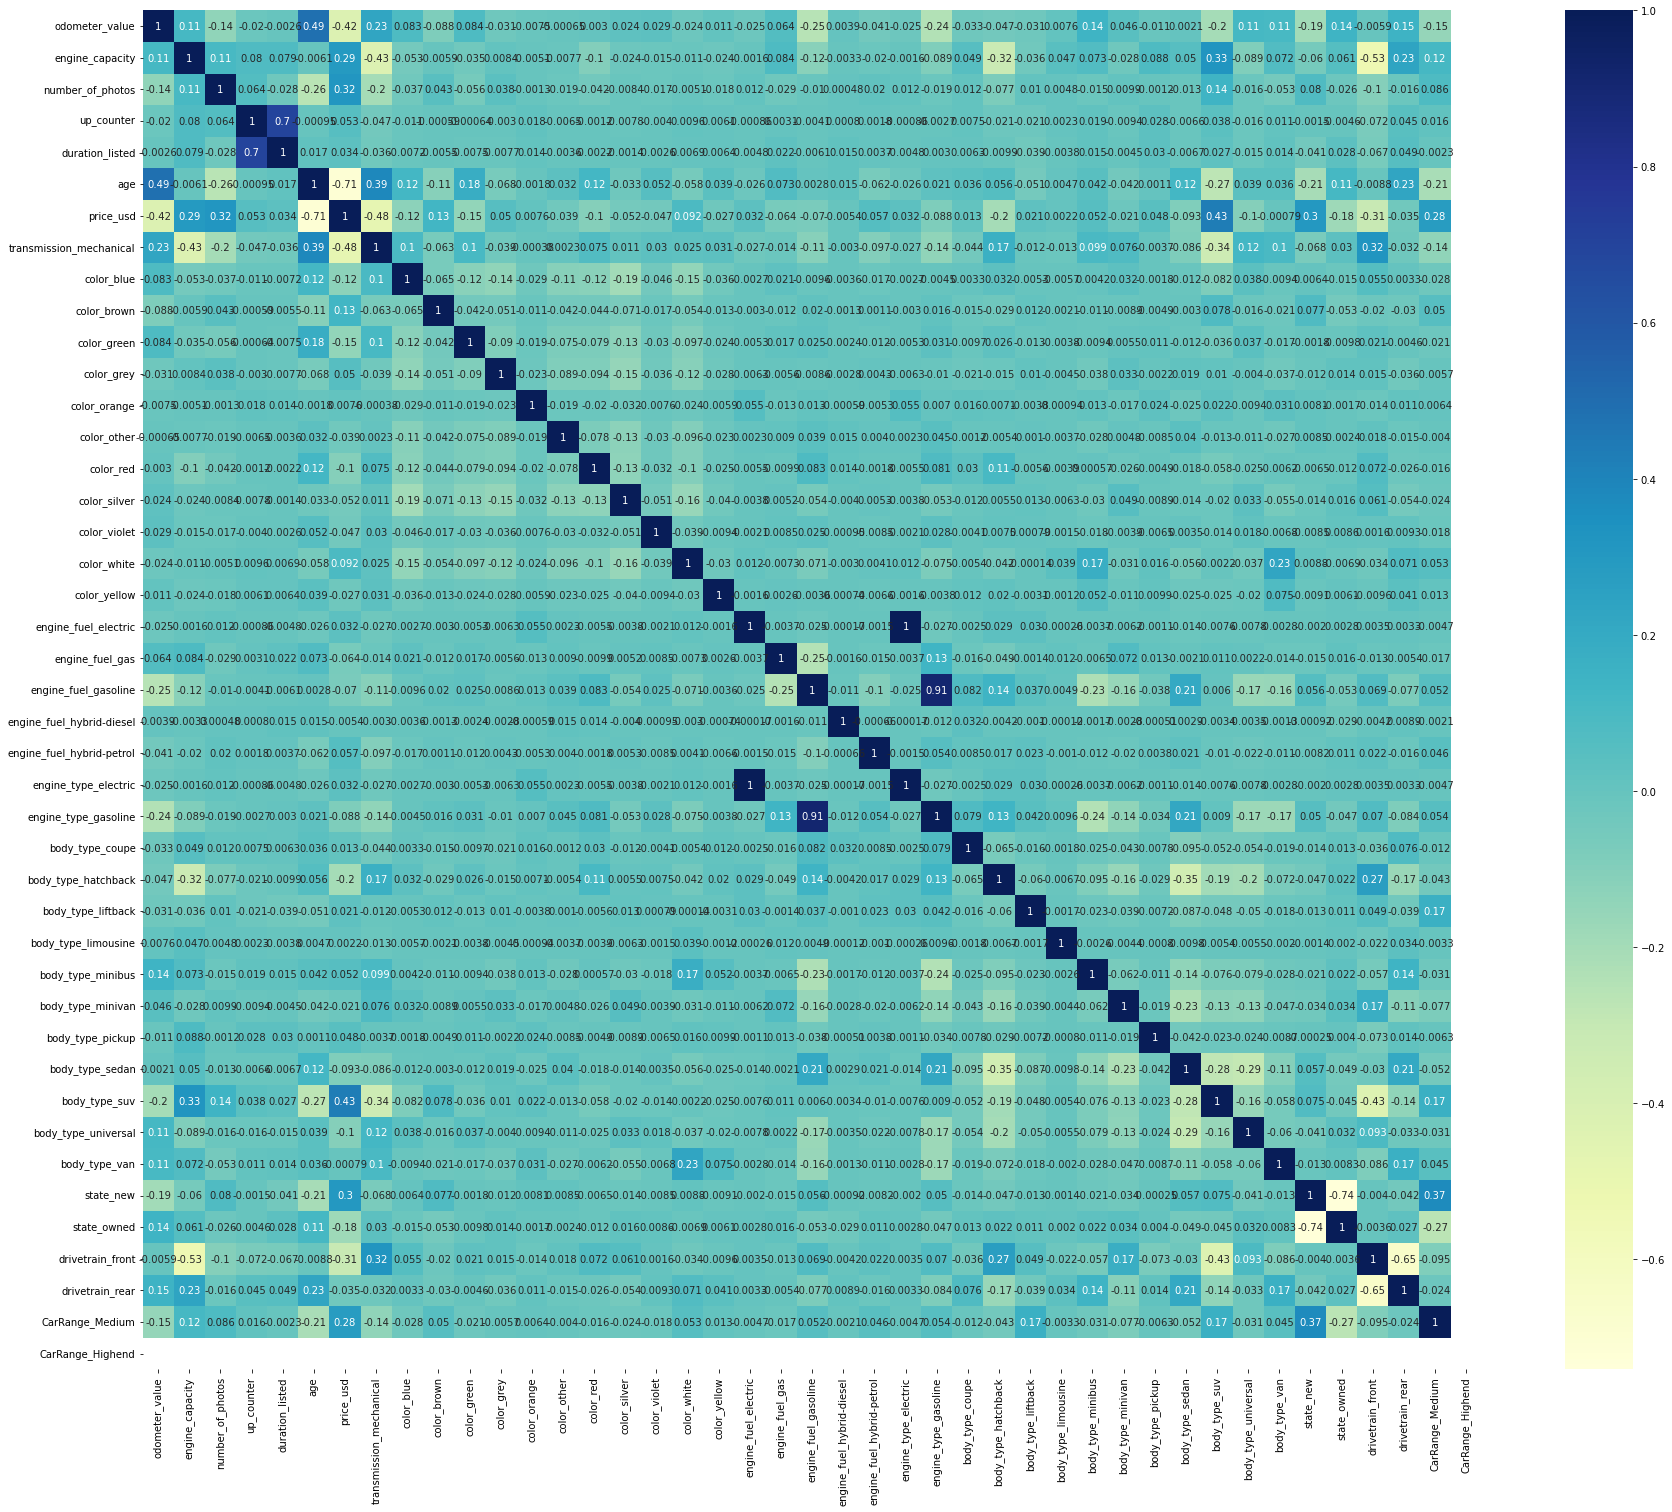

In [31]:
# correlation

plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
y_train = df_train.pop('price_usd')
X_train = df_train

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('odometer_value', True, 1),
 ('engine_capacity', True, 1),
 ('number_of_photos', True, 1),
 ('up_counter', False, 5),
 ('duration_listed', True, 1),
 ('age', True, 1),
 ('transmission_mechanical', False, 10),
 ('color_blue', False, 23),
 ('color_brown', False, 14),
 ('color_green', False, 24),
 ('color_grey', False, 31),
 ('color_orange', False, 26),
 ('color_other', False, 22),
 ('color_red', False, 32),
 ('color_silver', False, 18),
 ('color_violet', False, 25),
 ('color_white', False, 27),
 ('color_yellow', False, 28),
 ('engine_fuel_electric', False, 2),
 ('engine_fuel_gas', False, 20),
 ('engine_fuel_gasoline', False, 21),
 ('engine_fuel_hybrid-diesel', False, 13),
 ('engine_fuel_hybrid-petrol', False, 4),
 ('engine_type_electric', True, 1),
 ('engine_type_gasoline', False, 11),
 ('body_type_coupe', False, 29),
 ('body_type_hatchback', False, 6),
 ('body_type_liftback', False, 15),
 ('body_type_limousine', True, 1),
 ('body_type_minibus', True, 1),
 ('body_type_minivan', False, 

In [36]:
X_train.columns[rfe.support_]

Index(['odometer_value', 'engine_capacity', 'number_of_photos',
       'duration_listed', 'age', 'engine_type_electric', 'body_type_limousine',
       'body_type_minibus', 'state_new', 'drivetrain_front'],
      dtype='object')

In [37]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,odometer_value,engine_capacity,number_of_photos,duration_listed,age,engine_type_electric,body_type_limousine,body_type_minibus,state_new,drivetrain_front
912,0.121,0.166667,0.388235,0.010753,0.207792,0,0,0,0,1
16281,0.546,0.294872,0.035294,0.028674,0.272727,0,0,1,0,1
11836,1.000,0.230769,0.035294,0.038530,0.428571,0,0,0,0,0
13126,0.370,0.192308,0.070588,0.014785,0.350649,0,0,0,0,1
16552,0.480,0.217949,0.047059,0.012545,0.285714,0,0,0,0,1


In [38]:
def build_Lr_model(X,y):
    X = sm.add_constant(X) #add constant
    lm = sm.OLS(y,X).fit() #fit the model
    print(lm.summary())
    return X

def checkingVIF(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [39]:
X_train_1 = build_Lr_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:              price_usd   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     5573.
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:06:56   Log-Likelihood:                 32210.
No. Observations:               26971   AIC:                        -6.440e+04
Df Residuals:                   26960   BIC:                        -6.431e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2622 

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
checkingVIF(X_train_1)

,features,VIF
0,const,31.35
2,engine_capacity,1.45
10,drivetrain_front,1.42
5,age,1.41
1,odometer_value,1.38
3,number_of_photos,1.09
9,state_new,1.07
8,body_type_minibus,1.03
4,duration_listed,1.01
6,engine_type_electric,1.00


In [41]:
lm = sm.OLS(y_train,X_train_1).fit()
y_train_price = lm.predict(X_train_1)

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

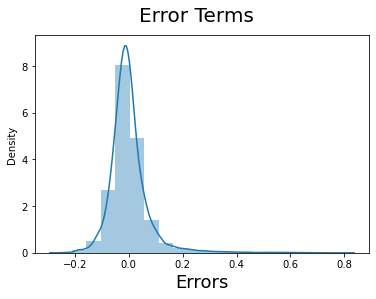

In [42]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [43]:
num_vars= ['odometer_value', 'engine_capacity', 'number_of_photos','up_counter','duration_listed', 'age','price_usd']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [44]:
y_test = df_test.pop('price_usd')
X_test = df_test

In [45]:
# Now let's use our model to make predictions.
X_train_1 = X_train_1.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_train_1 = X_test[X_train_1.columns]

# Adding a constant variable 
X_train_1 = sm.add_constant(X_train_1)

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [46]:
y_pred = lm.predict(X_train_1)

In [47]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5730250894032685

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [51]:
y = df_new.pop('price_usd')
X = df_new

In [52]:
polynomial = PolynomialFeatures(degree=2)
polynomial_model = polynomial.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(polynomial_model,y, train_size=0.7, random_state=42)

# Build second LR model using polynomial features
lr_model_2 = LinearRegression().fit(X_train,y_train)


#PRedict the values
y_train_pred = lr_model_2.predict(X_train)

#Predict test values
y_test_pred = lr_model_2.predict(X_test)

In [53]:
print(lr_model_2.score(X_test, y_test))

0.8358155690469793


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,5,1]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/job

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/job

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/job

    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_par

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/job

/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/job

    tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1252, in fit
    super().fit(
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aminazimi/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_par

In [57]:
print(gs.best_score_)
print(gs.best_params_)

0.8792327190090603
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [58]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)

print('Score: %.2f' % forest.score(X_test, y_test))

Score: 0.88


In [59]:
important_features = pd.Series(data=forest.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

age                          6.734963e-01
drivetrain_front             1.158118e-01
engine_capacity              1.068239e-01
odometer_value               3.260666e-02
transmission_mechanical      1.235551e-02
number_of_photos             8.823585e-03
engine_type_gasoline         8.071474e-03
body_type_minibus            6.502135e-03
duration_listed              6.452725e-03
up_counter                   4.417677e-03
body_type_suv                4.096305e-03
state_new                    2.839449e-03
body_type_sedan              2.689501e-03
engine_fuel_gasoline         2.486187e-03
CarRange_Medium              2.162081e-03
body_type_minivan            1.449529e-03
drivetrain_rear              1.213935e-03
body_type_coupe              8.717428e-04
engine_fuel_hybrid-petrol    6.577998e-04
color_red                    6.547676e-04
color_grey                   6.518027e-04
color_white                  6.219463e-04
state_owned                  5.395201e-04
body_type_van                4.768

In [60]:
#As predicted in EDA, Age is an important factor in Car Price Prediction.
#DriveTrain Font, Odometer Value, Engine Capacity are also in top 5 Features for Price Prediction. In EDA, we have identified these as the important features.
#We have obtained 88% Accuracy using Random Forest.